In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [3]:
csvdata = open('results/GW190412_amplitude_posterior_results.csv')
data = np.loadtxt(csvdata, delimiter=',')

amp = data[:, 0]
bf = data[:, 1]

1.0
[0.00046831] (100,)


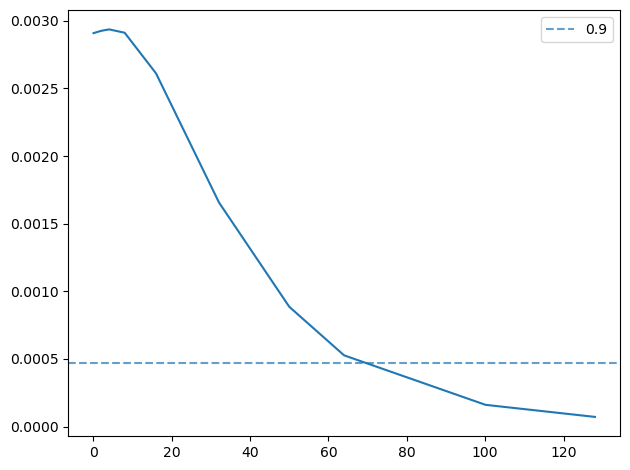

In [4]:
# to calculate highest posterior density interval, I first interpolate my graph.

bf_int = sp.interpolate.interp1d(amp, bf)

new_amp = np.linspace(0.0625, 128, 1000)

new_bf = bf_int(new_amp)
area = np.sum(new_bf)

prob = 1/area * new_bf
prob = prob/prob.sum()
t = np.linspace(0, prob.max(), 100)
integral = ((prob >= t[:, None]) * prob).sum(axis=1)

f = sp.interpolate.interp1d(integral, t)
probslevels = [0.9]
t_contours = f(np.array(probslevels))
print(t_contours, integral.shape)

plt.figure()
plt.plot(new_amp,prob)
for idx, contour in enumerate(t_contours):
    plt.axhline(contour, ls='--', alpha=0.7, label=f"{probslevels[idx]}")
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
idx = np.argwhere(np.diff(np.sign(prob - contour))).flatten()
print(idx)
if len(idx) < 2:
    idx = np.append(idx, [0])

print(sorted(new_amp[idx]))


[543]
[0.0625, 69.6021021021021]
